In [181]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


In [182]:
pd.set_option('display.max_columns', None)

In [183]:
model_features_cleaned = pd.read_csv('../data/model_features_cleaned.csv')
transformed_data = pd.read_csv('../data/transformed_data_men_21_to_24.csv')
season_dates_path = '../data/season_dates.csv'


In [184]:
redundant_columns = set(model_features_cleaned.columns).intersection(transformed_data.columns)

joined_df = pd.concat([transformed_data, model_features_cleaned.drop(redundant_columns, axis=1)], axis=1)

joined_df = joined_df.drop(columns=['won'])

joined_df.shape

(38352, 103)

In [185]:
numerical_cols = joined_df.select_dtypes(include=['number']).dropna(axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_cols)

pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

pca_df.shape, pca.explained_variance_ratio_

((38352, 39),
 array([0.15176361, 0.12493637, 0.07092953, 0.05557269, 0.04435712,
        0.03550771, 0.03429116, 0.03301151, 0.0309726 , 0.02862741,
        0.02749061, 0.02715244, 0.02220273, 0.02008368, 0.01716391,
        0.01469823, 0.0143434 , 0.01345052, 0.01338096, 0.01213986,
        0.01131776, 0.01106234, 0.01090114, 0.01019272, 0.01011937,
        0.00996965, 0.00949671, 0.00906748, 0.00855666, 0.00846669,
        0.00820833, 0.00772326, 0.00767355, 0.00725601, 0.00680714,
        0.00663269, 0.0063942 , 0.00583728, 0.0054888 ]))

In [186]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=numerical_cols.columns)

loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
team_score,-0.036860,-0.127790,0.085097,0.119759,0.008691,-0.120286,-0.062910,0.024923,-0.094985,-0.031338,-0.003488,-0.197957,0.023637,0.024248,0.046431,0.009169,0.009181,0.147515,-0.061662,-0.207056,0.029353,0.093943,0.171449,0.076326,-0.049145,-0.157729,-0.033839,-0.044315,-0.201577,-0.370747,0.056921,0.373887,0.238638,-0.118181,-0.049899,0.075669,-0.014868,-0.166748,0.105123
opponent_score,-0.038781,0.127318,0.084813,0.119138,-0.008863,0.121456,-0.064681,0.024495,-0.094447,0.019853,-0.007228,-0.197790,-0.024467,0.023125,-0.045251,0.012328,0.005244,0.058929,0.126234,0.201142,-0.013072,0.096938,0.167725,-0.115351,0.108183,0.165811,0.044404,0.041289,-0.175219,-0.391360,0.175053,0.134670,0.374019,0.090705,0.035099,0.088496,-0.019778,0.160178,-0.090027
season_year,-0.033461,0.001022,0.005511,0.076251,-0.001474,0.002198,0.002113,0.033139,-0.292910,-0.002536,0.001910,0.049176,-0.003676,-0.312322,0.001117,0.091197,-0.009384,-0.230983,-0.072223,-0.003615,-0.004986,0.031923,-0.037365,-0.367833,-0.045194,-0.241173,-0.047656,-0.016883,-0.027808,0.162895,-0.103748,-0.024539,0.035655,0.010552,-0.004049,-0.006195,-0.221565,-0.007472,0.032791
home_game,0.005708,-0.062945,0.000630,0.007067,-0.006832,-0.457013,0.005466,0.007049,-0.011282,0.286857,0.061151,-0.004240,-0.049116,0.000847,-0.044015,0.000765,0.030128,-0.034172,0.080960,0.067879,0.001093,-0.005453,-0.005780,-0.047642,0.032793,0.078411,0.012532,-0.027267,0.006025,-0.010833,0.004504,-0.043526,0.030962,0.027812,-0.010920,-0.005026,-0.003812,0.003508,-0.002131
underdog,-0.094347,0.081366,0.007008,-0.094648,-0.019049,0.025145,0.067342,0.000465,0.001781,0.043832,0.033065,-0.061124,-0.045057,-0.004215,-0.007422,-0.023980,0.119197,-0.003380,0.251198,-0.168174,0.393914,0.112276,0.068599,0.038406,0.070186,-0.132367,0.048411,0.321091,0.112147,0.037996,-0.034911,0.104607,-0.199493,-0.015260,0.065925,0.446174,0.034590,0.183078,-0.143394


In [187]:
loadings['PC39'].abs().sort_values(ascending=False).to_dict()

{'pf_opp': 0.5323301012634815,
 'pf': 0.46929162346546927,
 'upset_rate_opp': 0.3001135874298704,
 'upset_rate': 0.2845720334087546,
 'plus_minus': 0.15558579790112897,
 'stl_opp': 0.14523545473847072,
 'underdog': 0.14339367696536498,
 'stl': 0.13535179564580777,
 'underdog_opp': 0.13452001332209057,
 'matchup_win_rate': 0.12777718251847764,
 '3mean_plus_minus_opp': 0.12638676347178768,
 'physicality_score_opp': 0.10601529099149903,
 'team_score': 0.10512272487485246,
 'fta_opp': 0.09552561773513804,
 'physicality_score': 0.09491528834318157,
 'de_opp': 0.0934962440640753,
 'drb_opp': 0.09313188497227043,
 'opponent_score': 0.09002680071381515,
 '3mean_plus_minus': 0.0870962212214812,
 'ft_opp': 0.08553700025210378,
 'conf_rank': 0.07749505806325749,
 'de': 0.07447905396031208,
 'sos_opp': 0.07363674322690511,
 'drb': 0.07023711761157066,
 'conf_rank_opp': 0.0694133667106246,
 'poss_per_game_opp': 0.06812198449337206,
 'sos': 0.06803969255902259,
 'orb_opp': 0.06755590059993934,
 'pos

In [188]:
loadings['PC1'].abs().sort_values(ascending=False).to_dict()

{'srs_opp': 0.19402454366009272,
 'srs': 0.19186616778616622,
 'oe_opp': 0.1779437884099462,
 'oe': 0.17532078455893513,
 'ast_to_tov_opp': 0.17152730528349308,
 'te_opp': 0.17068430715485292,
 'ast_to_tov': 0.16917644333485607,
 'te': 0.16775279862632528,
 'game_win_rate_opp': 0.1673984365600043,
 'game_win_rate': 0.1645841150423164,
 'w_opp': 0.1566244801668205,
 'w': 0.15406869490548605,
 'tov_per_poss_opp': 0.14711263255397333,
 'fg_opp': 0.14549048647293103,
 'tov_per_poss': 0.14504225050854264,
 'l_opp': 0.14419472436622213,
 'fg': 0.14304536430664894,
 'ast_opp': 0.1427959014481054,
 'l': 0.1417485507651993,
 'sos_opp': 0.14106773902942643,
 'sos': 0.1405630677412017,
 'ast': 0.1404942961883653,
 'tov%_opp': 0.13821231374091408,
 'ast_per_poss_opp': 0.13655759133904788,
 'tov%': 0.13645919406491314,
 'ast_per_poss': 0.13468917730646024,
 'fg%_opp': 0.13314550854231647,
 'fg%': 0.13082390992693674,
 'upset_rate_opp': 0.12719244641196323,
 'upset_rate': 0.1258632943401341,
 'conf_

In [189]:
selected_features = [
    'srs_opp', 'srs', 'oe_opp', 'oe', 'ast_to_tov_opp', 'te_opp', 
    'ast_to_tov', 'te', 'game_win_rate_opp', 'game_win_rate', 
    'w_opp', 'w', 'tov_per_poss_opp', 'fg_opp', 'tov_per_poss', 
    'l_opp', 'fg', 'ast_opp', 'l', 'sos_opp', 'sos', 'ast', 
    'tov%_opp', 'ast_per_poss_opp', 'tov%', 'ast_per_poss', 
    'fg%_opp', 'fg%', 'conf_rank_opp', 'conf_rank', 'tov_opp', 'tov',
    'de'
]

In [190]:
clustering_data = joined_df[selected_features]

scaler = StandardScaler()
standardized_data = scaler.fit_transform(clustering_data)


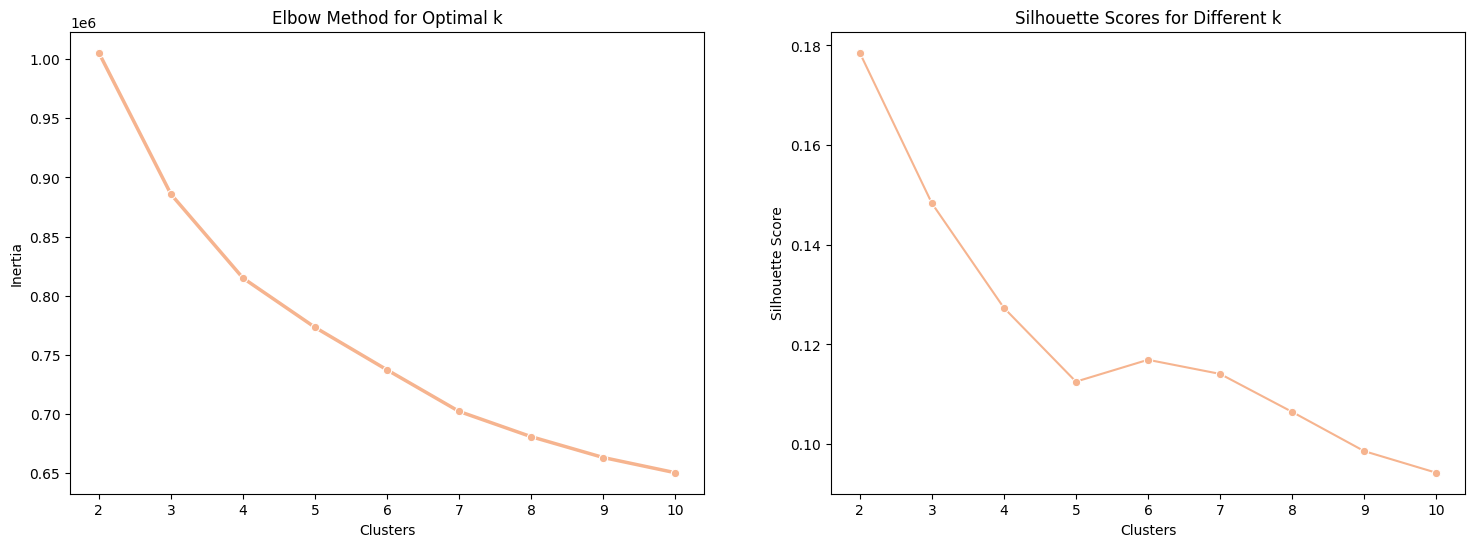

In [114]:

inertia = []
silhouette_scores = []
range_clusters = range(2, 11)

sns.set_palette('rocket_r')

inertia = []
silhouette_scores = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(standardized_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(standardized_data, cluster_labels))

elbow_data = pd.DataFrame({'Clusters': range_clusters, 'Inertia': inertia})
silhouette_data = pd.DataFrame({'Clusters': range_clusters, 'Silhouette Score': silhouette_scores})

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=elbow_data, x='Clusters', y='Inertia', marker='o', linewidth=2.5)
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
sns.lineplot(data=silhouette_data, x='Clusters', y='Silhouette Score', marker='o')
plt.title('Silhouette Scores for Different k')

plt.show()


In [179]:
silhouette_data

,Clusters,Silhouette Score
0,2,0.178548
1,3,0.148356
2,4,0.127354
3,5,0.112536
4,6,0.116922
5,7,0.114091
6,8,0.106469
7,9,0.098597
8,10,0.094259


/var/folders/nq/wq26v42s50v9qsf0ltxbsm4w0000gp/T/ipykernel_40724/1819631777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Silhouette Score', y='Clusters', data=silhouette_data, orient='h', palette='rocket_r')


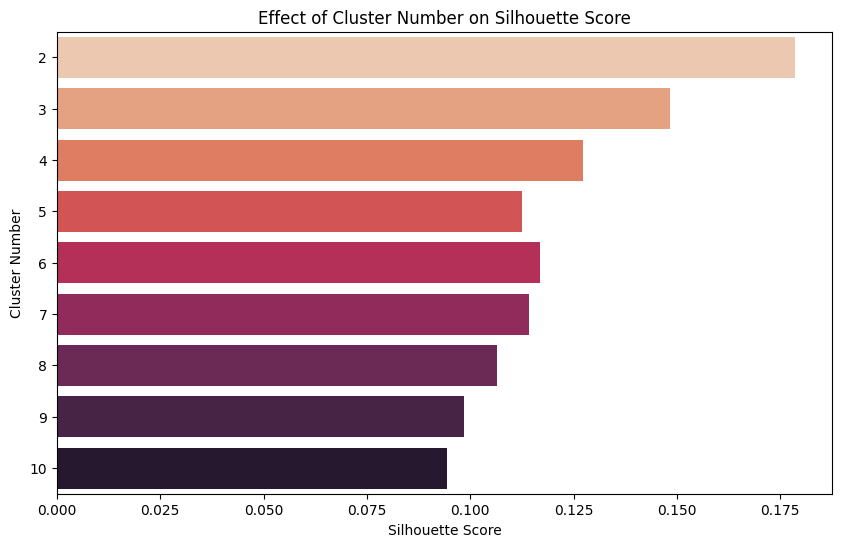

In [180]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Silhouette Score', y='Clusters', data=silhouette_data, orient='h', palette='rocket_r')
plt.title('Effect of Cluster Number on Silhouette Score')
plt.xlabel('Silhouette Score')
plt.ylabel('Cluster Number')
plt.show()

In [115]:
# USING ELBOW METHOD
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(standardized_data)

clustering_data['Cluster_KMeans'] = cluster_labels


# USING SILHOUTTE SCORES METHOD
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(standardized_data)

clustering_data['Cluster'] = cluster_labels

/var/folders/nq/wq26v42s50v9qsf0ltxbsm4w0000gp/T/ipykernel_40724/205310377.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster_KMeans'] = cluster_labels
/var/folders/nq/wq26v42s50v9qsf0ltxbsm4w0000gp/T/ipykernel_40724/205310377.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster'] = cluster_labels


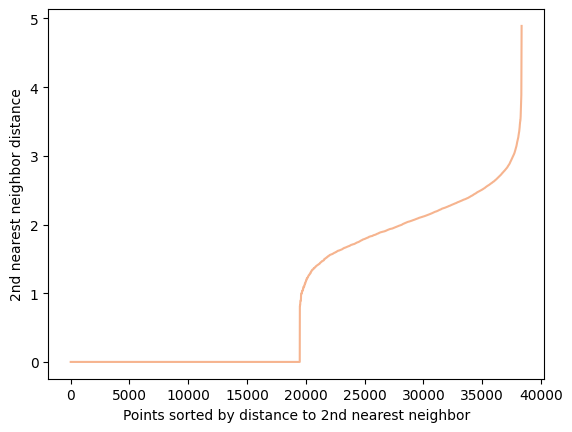

In [116]:

n_neighbors = len(clustering_data.columns)

neigh = NearestNeighbors(n_neighbors=n_neighbors)
nbrs = neigh.fit(standardized_data)
distances, indices = nbrs.kneighbors(standardized_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Points sorted by distance to 2nd nearest neighbor')
plt.ylabel('2nd nearest neighbor distance')
plt.show()

In [117]:
eps_value = 0.5
silhouette_scores = []

for min_samples in range(1, len(clustering_data.columns)):
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
    labels = dbscan.fit_predict(standardized_data)
    
    if len(set(labels)) > 1 and np.sum(labels != -1) > 1:
        score = silhouette_score(standardized_data, labels)
    else:
        score = -1
    silhouette_scores.append(score)

for i, score in enumerate(silhouette_scores):
    print(f"min_samples = {i+1}, Silhouette Score = {score}")

min_samples = 1, Silhouette Score = 0.5079787234042553
min_samples = 2, Silhouette Score = 0.1801461028836022
min_samples = 3, Silhouette Score = -0.42597927621837134
min_samples = 4, Silhouette Score = -0.44472719461752963
min_samples = 5, Silhouette Score = -0.3926614287484647
min_samples = 6, Silhouette Score = -0.372812069430183
min_samples = 7, Silhouette Score = -0.34732277962793284
min_samples = 8, Silhouette Score = -0.34732277962793284
min_samples = 9, Silhouette Score = -0.3270330869790682
min_samples = 10, Silhouette Score = -0.3270330869790682
min_samples = 11, Silhouette Score = -0.31204787986273747
min_samples = 12, Silhouette Score = -0.31204787986273747
min_samples = 13, Silhouette Score = -0.23862374505018272
min_samples = 14, Silhouette Score = -0.23862374505018272
min_samples = 15, Silhouette Score = -0.23862374505018272
min_samples = 16, Silhouette Score = -0.23862374505018272
min_samples = 17, Silhouette Score = -0.23862374505018272
min_samples = 18, Silhouette Sco

In [118]:

dbscan = DBSCAN(eps=0.5, min_samples=1)  
cluster_labels_dbscan = dbscan.fit_predict(standardized_data)

clustering_data['Cluster_DBSCAN'] = cluster_labels_dbscan

/var/folders/nq/wq26v42s50v9qsf0ltxbsm4w0000gp/T/ipykernel_40724/235918480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster_DBSCAN'] = cluster_labels_dbscan


In [119]:
silhouette_score_dbscan = silhouette_score(standardized_data, cluster_labels_dbscan)
print(f"Silhouette Score for DBSCAN: {silhouette_score_dbscan}")

Silhouette Score for DBSCAN: 0.5079787234042553


In [120]:
print(len(clustering_data.Cluster_DBSCAN.unique()))
print(clustering_data.shape)

27750
(38352, 36)


In [121]:
centroids = kmeans.cluster_centers_

original_centroids = scaler.inverse_transform(centroids)

centroid_df = pd.DataFrame(original_centroids, columns=selected_features)

cluster_sizes = clustering_data['Cluster_KMeans'].value_counts().sort_index()

print("Cluster Sizes:\n", cluster_sizes)
print("\nCluster Centroids:\n", centroid_df)

Cluster Sizes:
 Cluster_KMeans
0    18187
1    20165
Name: count, dtype: int64

Cluster Centroids:
     srs_opp       srs      oe_opp          oe  ast_to_tov_opp    te_opp  \
0  6.308892  6.667069  107.910119  108.143770        1.196944  1.074208   
1 -5.484098 -5.812029  101.559123  101.345032        0.973436  0.986502   

   ast_to_tov        te  game_win_rate_opp  game_win_rate      w_opp  \
0    1.203693  1.078731           0.610982       0.619684  18.411538   
1    0.967281  0.982373           0.444275       0.436452  12.789847   

           w  tov_per_poss_opp     fg_opp  tov_per_poss      l_opp         fg  \
0  18.696593          0.320844  26.611662      0.319812  11.464670  26.666890   
1  12.534091          0.356925  25.019328      0.357835  15.737098  24.966093   

     ast_opp          l   sos_opp       sos        ast   tov%_opp  \
0  14.033173  11.237143  2.751127  2.791197  14.079267  14.985044   
1  12.591044  15.938815 -2.349906 -2.388076  12.545786  16.526692   

   as

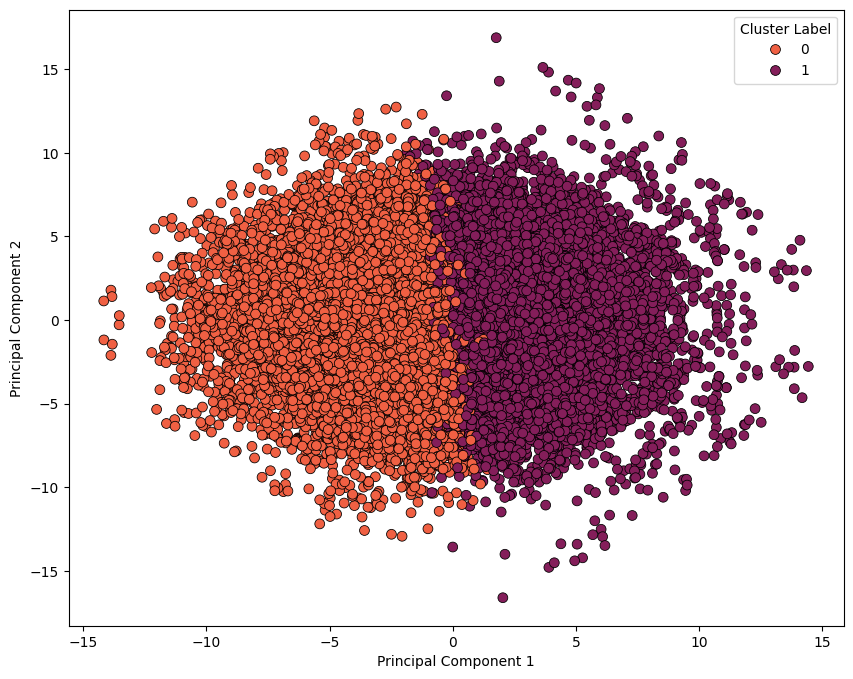

In [154]:
sns.set_palette('rocket_r')

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_df.iloc[:, 0], y=pca_df.iloc[:, 1], hue=cluster_labels, palette='rocket_r', marker='o', edgecolor='black', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Label')
plt.show()

In [123]:
silhouette_avg = silhouette_score(standardized_data, cluster_labels)
print(f"The average silhouette_score is : {silhouette_avg}")

The average silhouette_score is : 0.17854778738892205


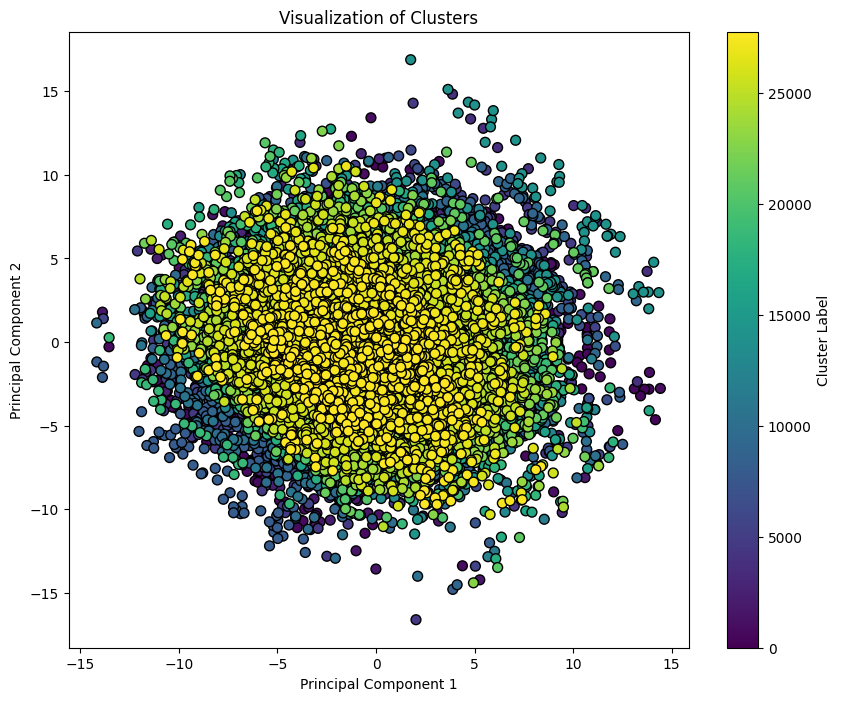

In [124]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=cluster_labels_dbscan, cmap='viridis', marker='o', edgecolor='black', s=50)
plt.title('Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

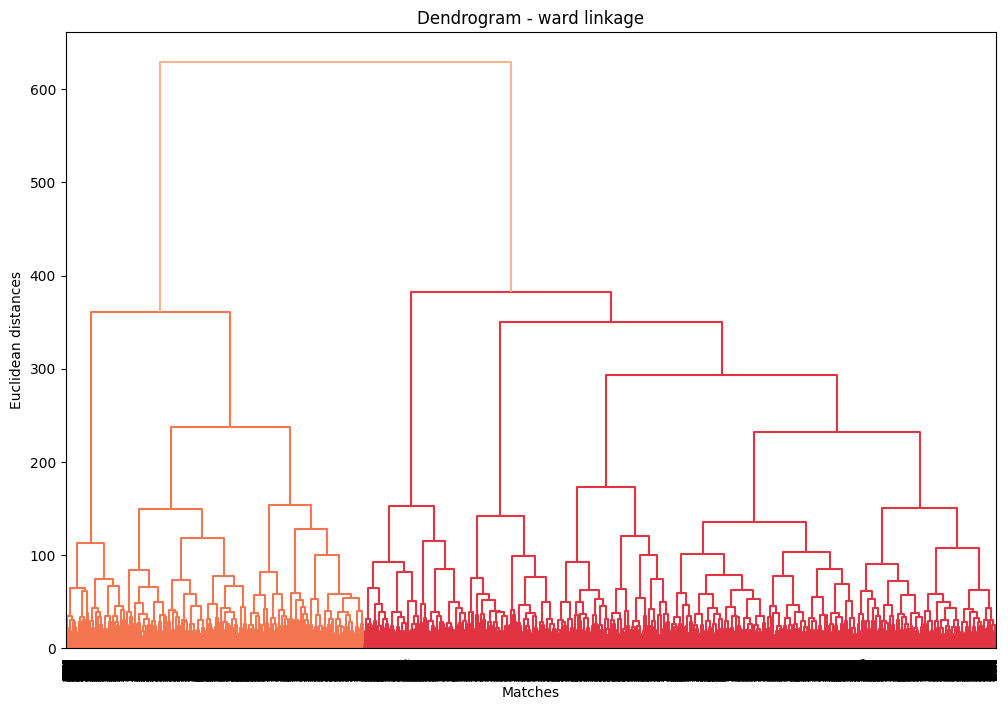

In [155]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

linkage_types = ['ward']
                 # , 'complete', 'average']

for linkage in linkage_types:
    plt.figure(figsize=(12, 8))
    dendrogram = sch.dendrogram(sch.linkage(standardized_data, method=linkage))
    plt.title(f'Dendrogram - {linkage} linkage')
    plt.xlabel('Matches')
    plt.ylabel('Euclidean distances')
    plt.show()


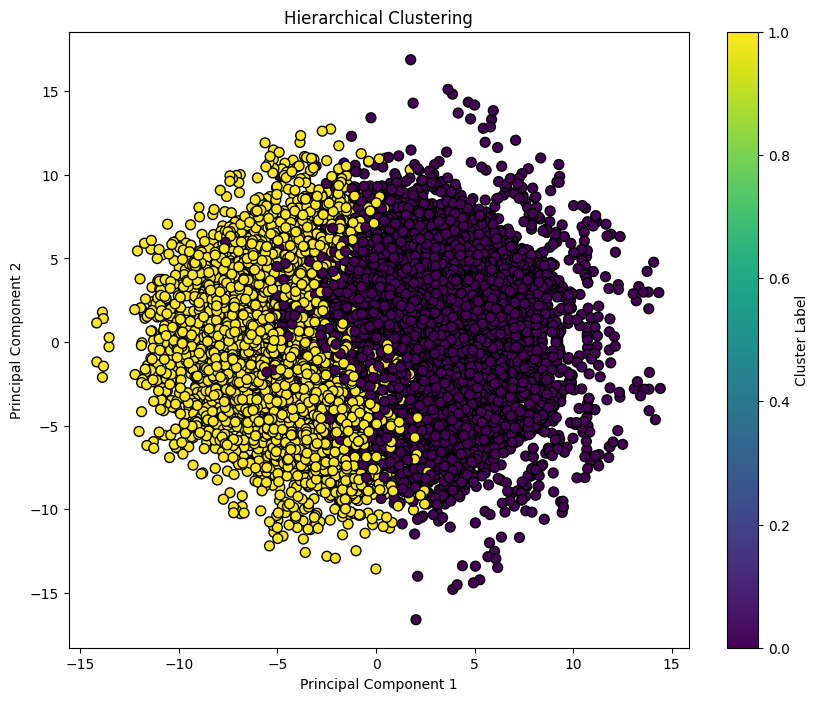

In [156]:
n_clusters = 2  

hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels_hc = hc.fit_predict(standardized_data)

clustering_data['Cluster_HC'] = cluster_labels_hc

plt.figure(figsize=(10, 8))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=cluster_labels_hc, cmap='viridis', marker='o', edgecolor='black', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [157]:
silhouette_avg = silhouette_score(standardized_data, cluster_labels_hc)
print(f"The average silhouette_score is : {silhouette_avg}")

The average silhouette_score is : 0.15169377778545975


In [130]:
non_numerical_cols = joined_df.select_dtypes(exclude=['number'])


In [131]:
non_clustered_cols = list(non_numerical_cols.columns)
non_clustered_cols

['team', 'opponent', 'game_round', 'season_type', 'date', 'conf', 'conf_opp']

In [132]:
non_clustered_cols.append('seed')
non_clustered_cols.append('seed_opp')
non_clustered_cols.append('conf_rank')
non_clustered_cols.append('conf_rank_opp')

non_clustered_cols

['team',
 'opponent',
 'game_round',
 'season_type',
 'date',
 'conf',
 'conf_opp',
 'seed',
 'seed_opp',
 'conf_rank',
 'conf_rank_opp']

In [133]:
teams_df = joined_df[non_clustered_cols]

In [134]:
final_df = pd.concat([teams_df, clustering_data], axis=1)

In [173]:
final_df.columns

Index(['team', 'opponent', 'game_round', 'season_type', 'date', 'conf',
       'conf_opp', 'seed', 'seed_opp', 'conf_rank', 'conf_rank_opp', 'srs_opp',
       'srs', 'oe_opp', 'oe', 'ast_to_tov_opp', 'te_opp', 'ast_to_tov', 'te',
       'game_win_rate_opp', 'game_win_rate', 'w_opp', 'w', 'tov_per_poss_opp',
       'fg_opp', 'tov_per_poss', 'l_opp', 'fg', 'ast_opp', 'l', 'sos_opp',
       'sos', 'ast', 'tov%_opp', 'ast_per_poss_opp', 'tov%', 'ast_per_poss',
       'fg%_opp', 'fg%', 'conf_rank_opp', 'conf_rank', 'tov_opp', 'tov', 'de',
       'Cluster_KMeans', 'Cluster', 'Cluster_DBSCAN', 'Cluster_HC'],
      dtype='object')

/var/folders/nq/wq26v42s50v9qsf0ltxbsm4w0000gp/T/ipykernel_40724/2167183886.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster_KMeans', y='oe', data=efficiency_df, palette='rocket_r', ax=axes[0], width=0.25)
/var/folders/nq/wq26v42s50v9qsf0ltxbsm4w0000gp/T/ipykernel_40724/2167183886.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster_KMeans', y='de', data=efficiency_df, palette='rocket_r', ax=axes[1], width=0.25)


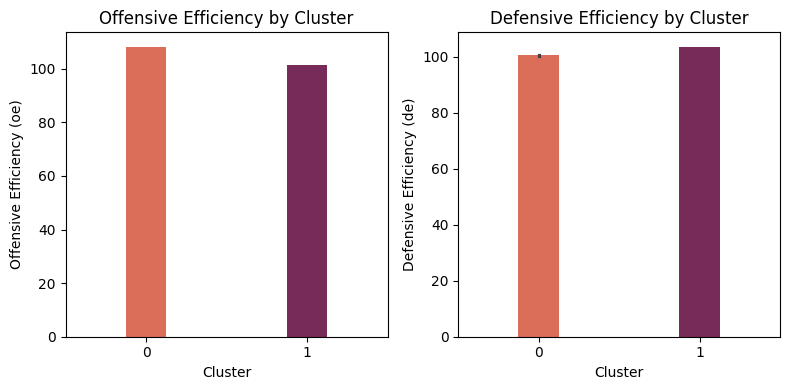

In [169]:
efficiency_df = final_df[['Cluster_KMeans', 'oe', 'de']]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.barplot(x='Cluster_KMeans', y='oe', data=efficiency_df, palette='rocket_r', ax=axes[0], width=0.25)
axes[0].set_title('Offensive Efficiency by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Offensive Efficiency (oe)')

sns.barplot(x='Cluster_KMeans', y='de', data=efficiency_df, palette='rocket_r', ax=axes[1], width=0.25)
axes[1].set_title('Defensive Efficiency by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Defensive Efficiency (de)')

plt.tight_layout()
plt.show()

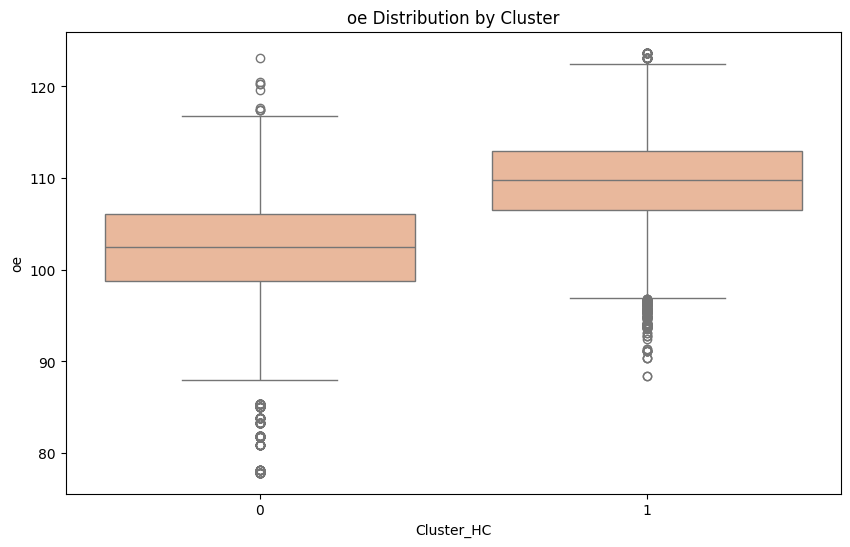

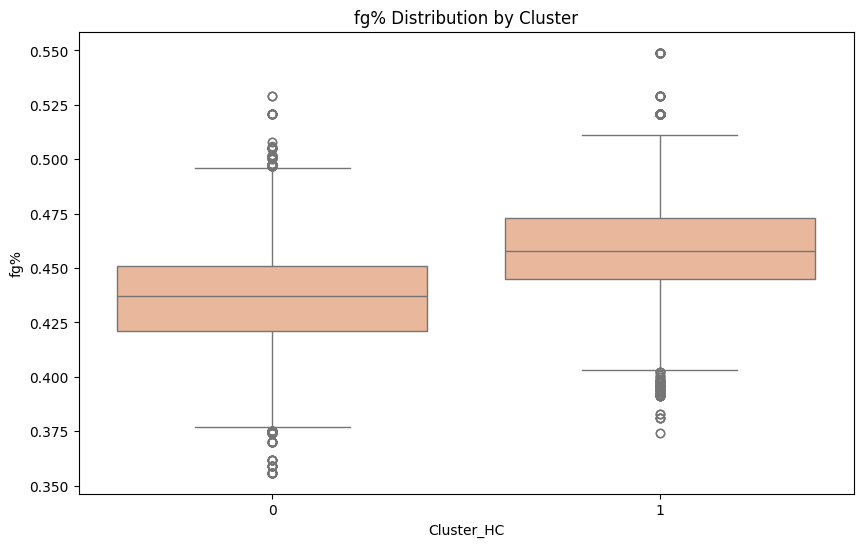

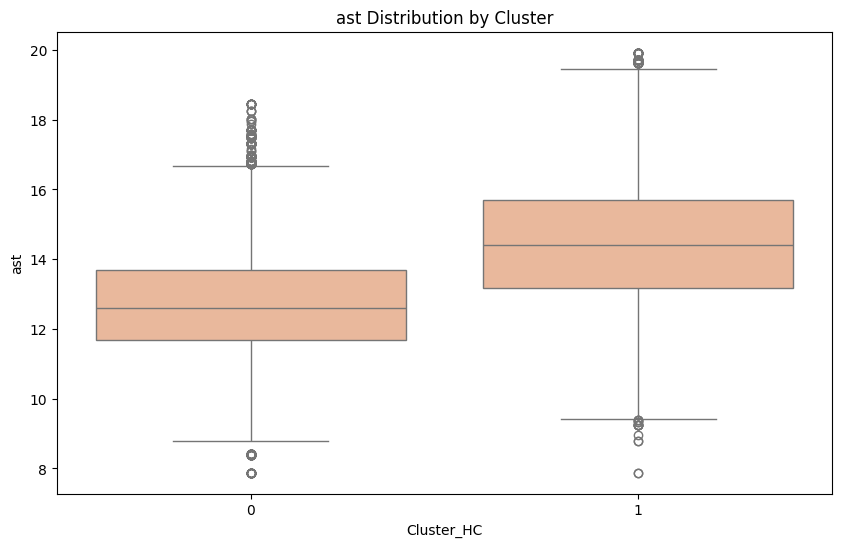

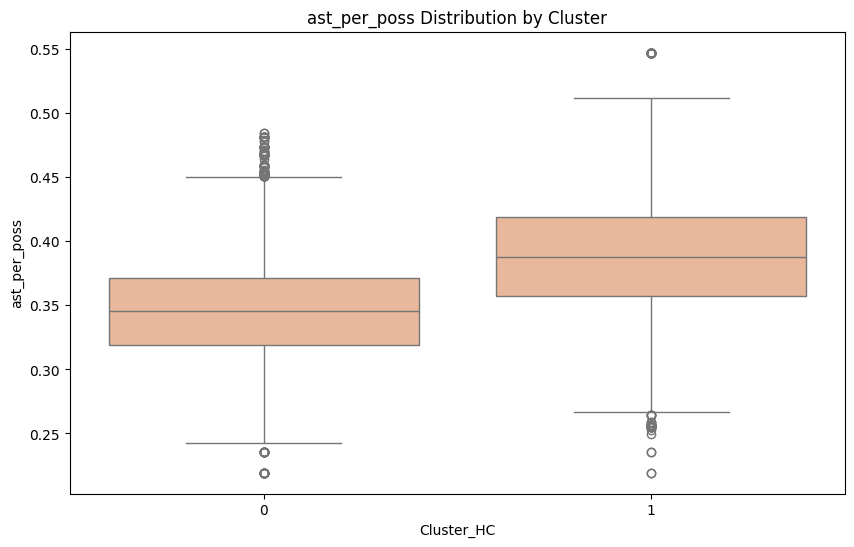

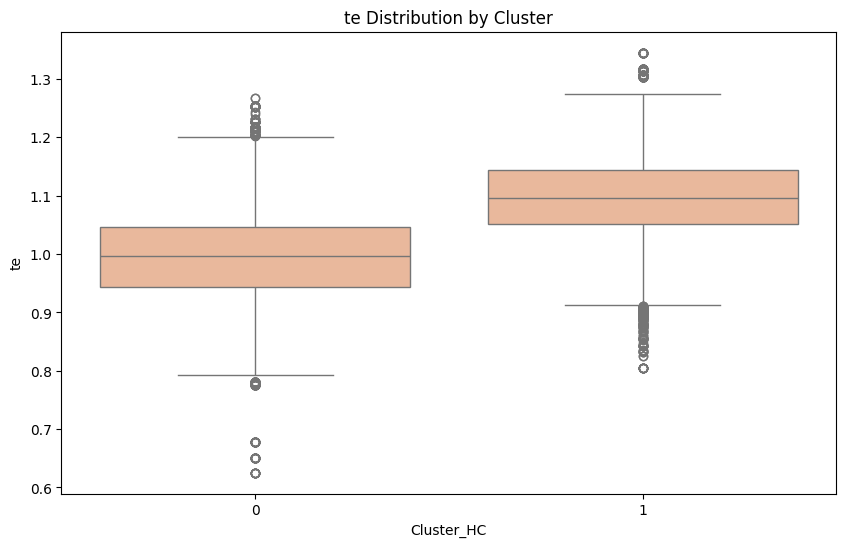

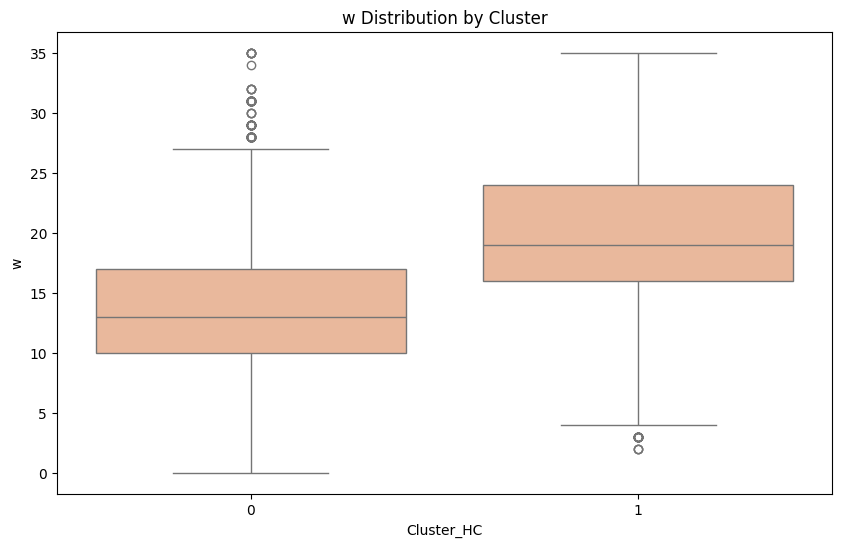

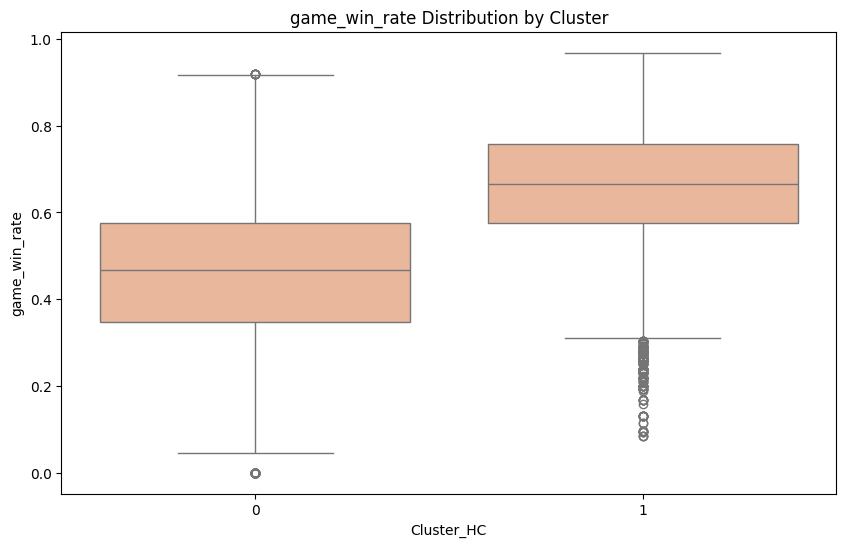

In [174]:
offensive_features = [
    'oe',           # Offensive efficiency
    'fg%',          # Field goal percentage
    'ast',          # Assists
    'ast_per_poss', # Assists per possession
    'te',           # Team efficiency
    'w',            # Wins
    'game_win_rate', # Game win rate
    'Cluster_HC'
]


cluster_characteristics = final_df[offensive_features].groupby('Cluster_HC').agg(['mean', 'median', 'std'])

features_to_visualize = final_df[offensive_features].columns.drop('Cluster_HC')

for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_HC', y=feature, data=final_df)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel('Cluster_HC')
    plt.ylabel(feature)
    plt.show()


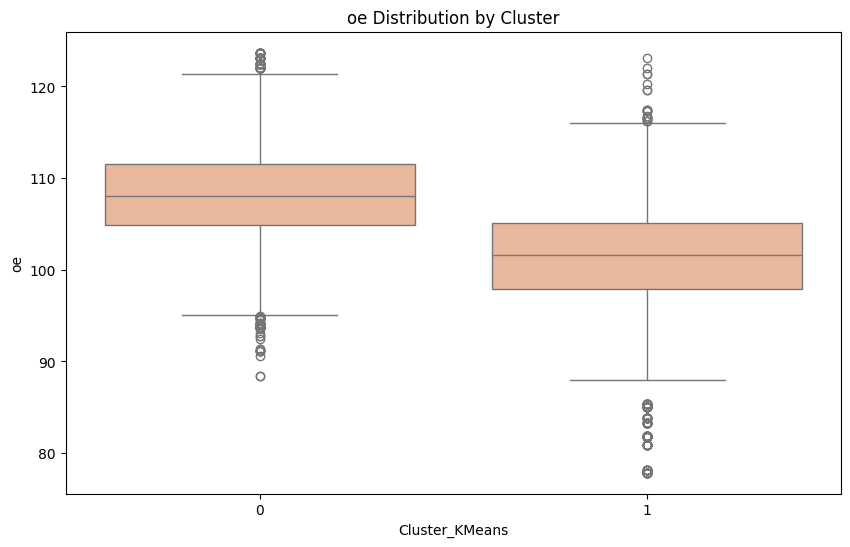

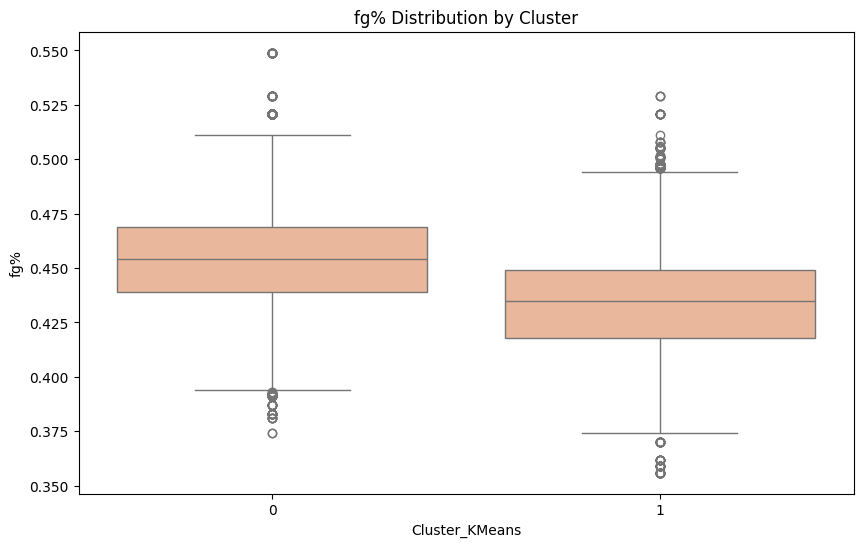

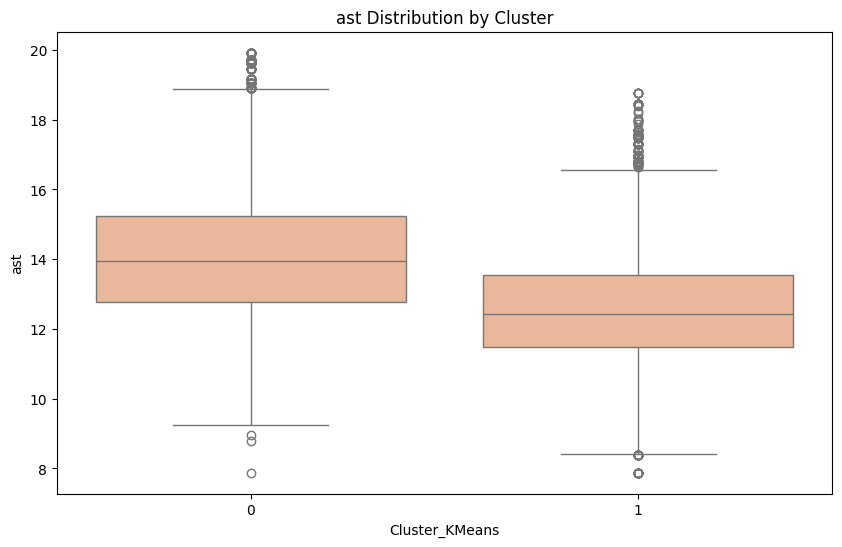

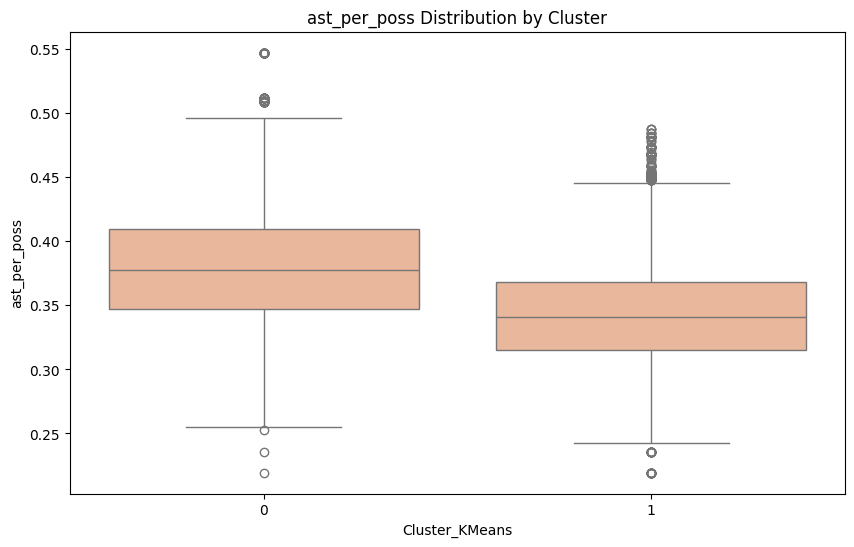

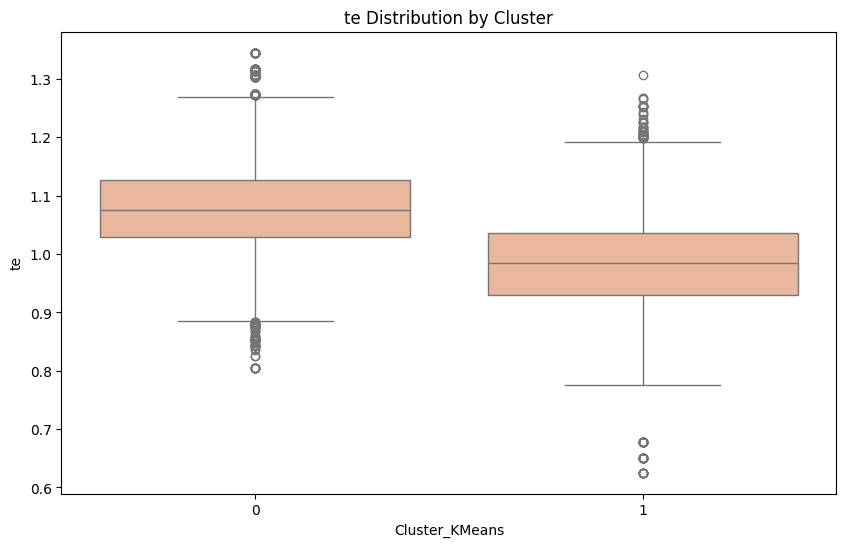

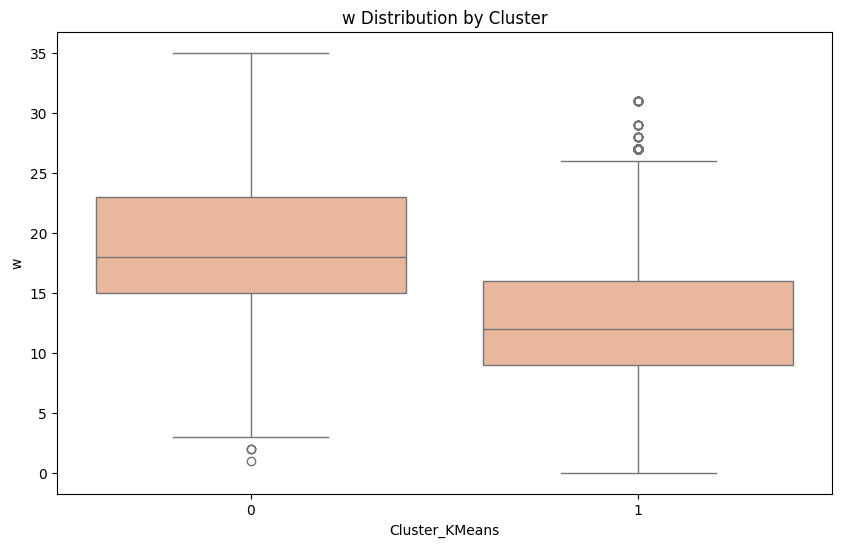

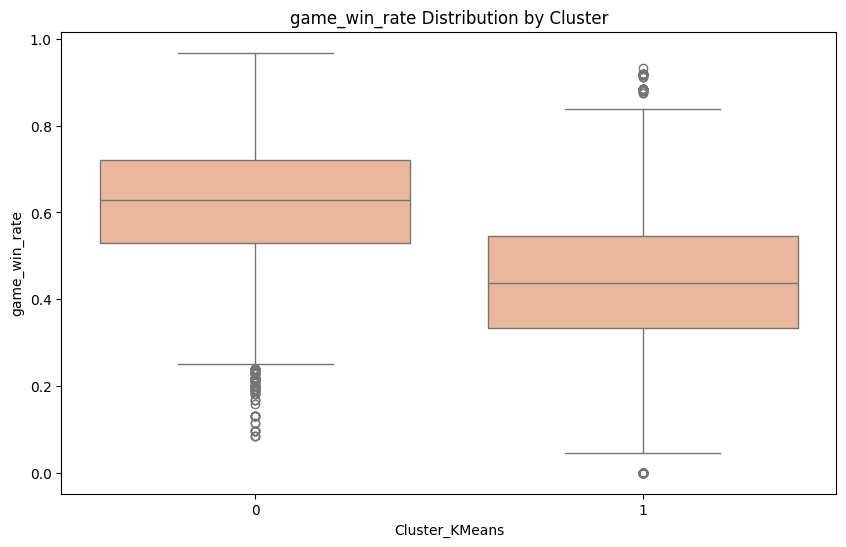

In [136]:
offensive_features = [
    'oe',           # Offensive efficiency
    'fg%',          # Field goal percentage
    'ast',          # Assists
    'ast_per_poss', # Assists per possession
    'te',           # Team efficiency
    'w',            # Wins
    'game_win_rate', # Game win rate
    'Cluster_KMeans'
]


cluster_characteristics = final_df[offensive_features].groupby('Cluster_KMeans').agg(['mean', 'median', 'std'])

features_to_visualize = final_df[offensive_features].columns.drop('Cluster_KMeans')

for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_KMeans', y=feature, data=final_df)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel('Cluster_KMeans')
    plt.ylabel(feature)
    plt.show()


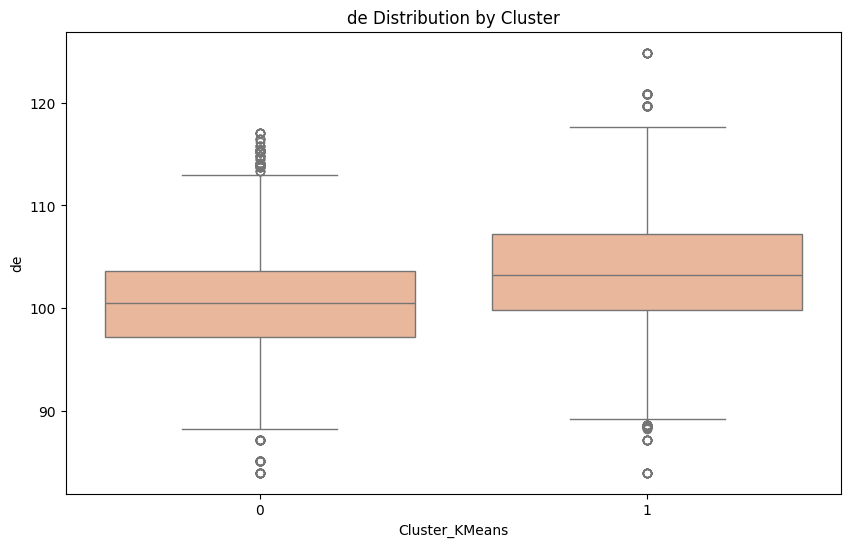

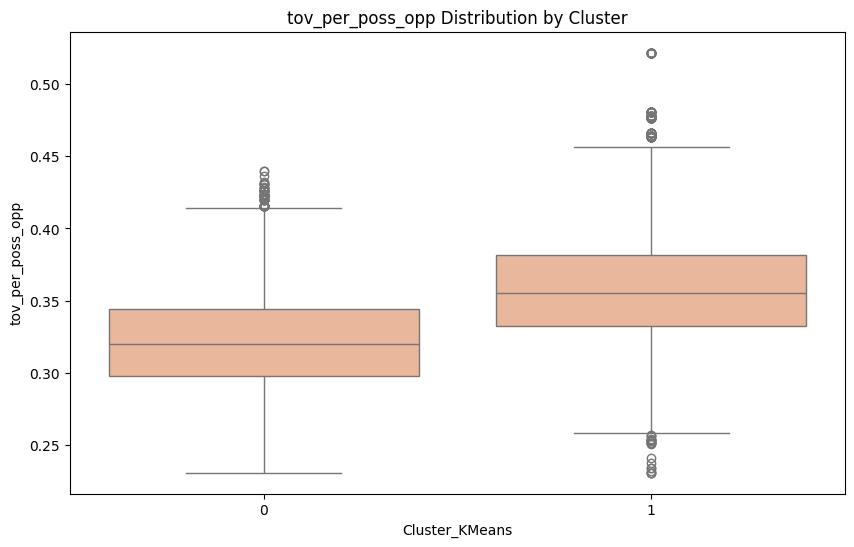

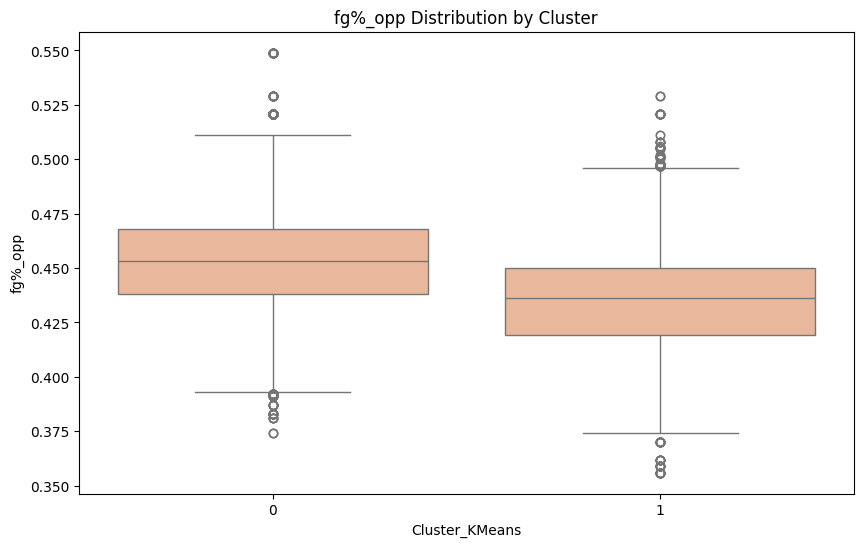

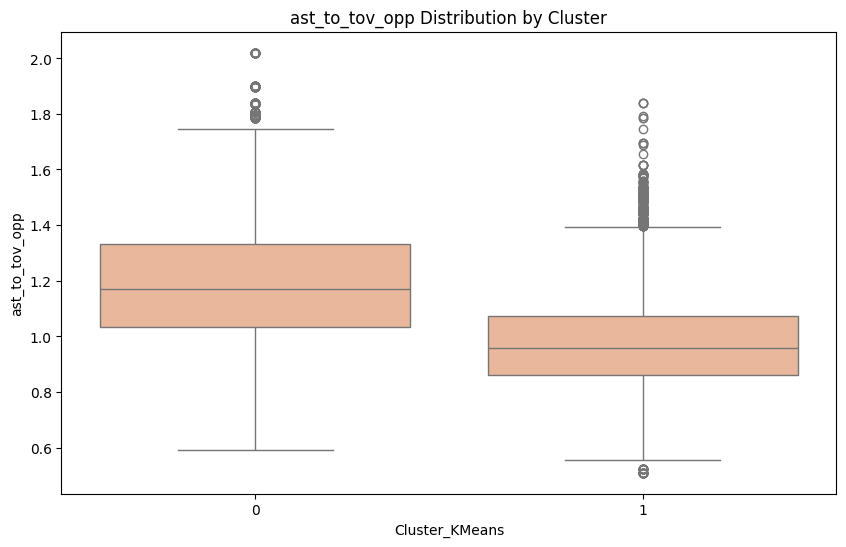

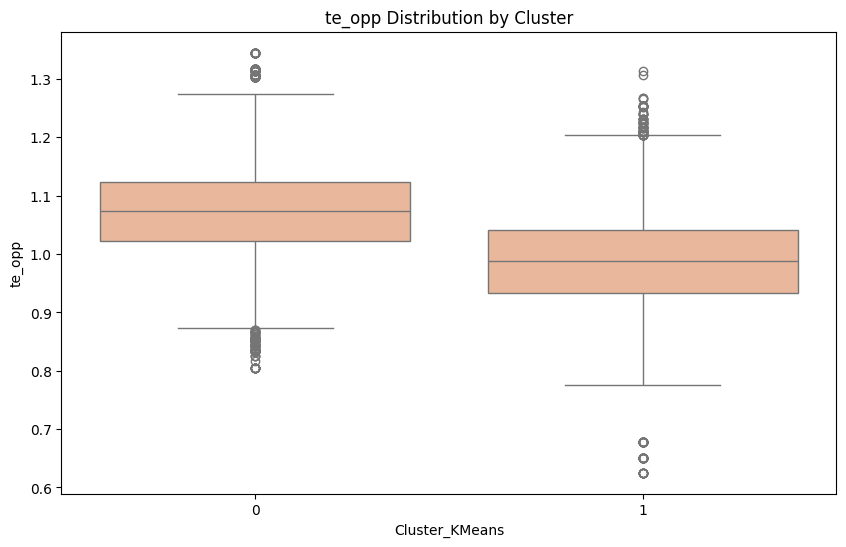

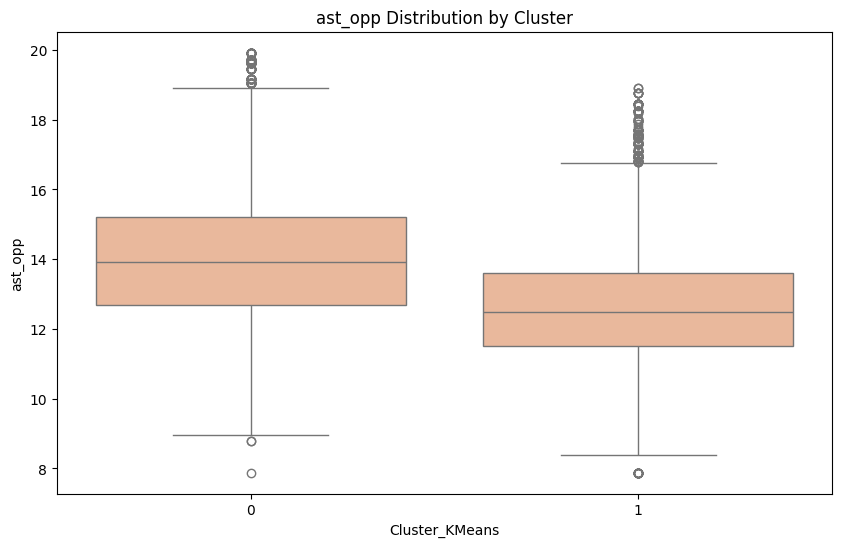

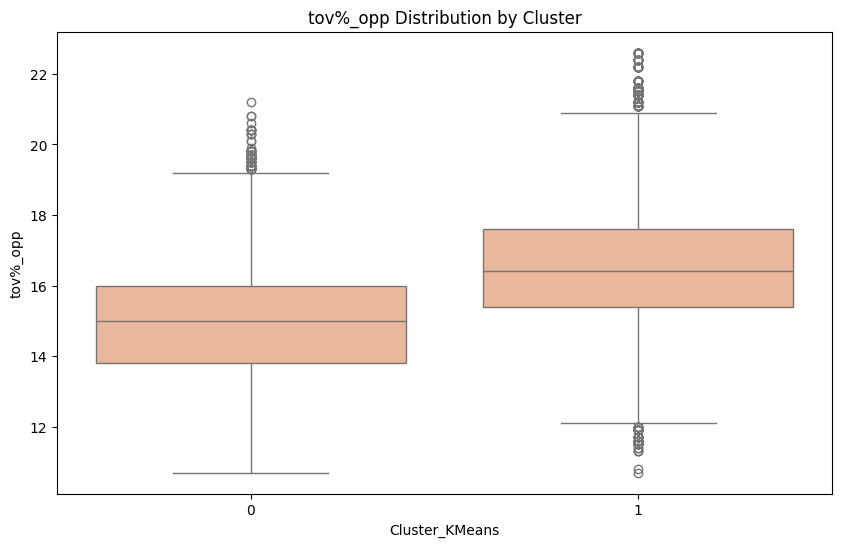

In [137]:
defensive_features = [
    'de',           # Defensive efficiency
    'tov_per_poss_opp', # Turnovers per possession of opponent
    'fg%_opp',      # Opponent field goal percentage
    'ast_to_tov_opp',   # Assist-to-turnover ratio of opponent
    'te_opp',        # Opponent team efficiency
    'ast_opp',        # assist of opponent
    'tov%_opp',        # turnover % of opponent
    'Cluster_KMeans'
]



cluster_characteristics = final_df[defensive_features].groupby('Cluster_KMeans').agg(['mean', 'median', 'std'])

features_to_visualize = final_df[defensive_features].columns.drop('Cluster_KMeans')

for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_KMeans', y=feature, data=final_df)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel('Cluster_KMeans')
    plt.ylabel(feature)
    plt.show()


In [138]:
tournament_df = final_df[final_df['season_type'] == 'ncaa_tournament']

rounds_by_cluster = tournament_df.groupby(['Cluster_KMeans', 'game_round']).size().unstack(fill_value=0)

rounds_by_cluster

game_round,CHAMPIONSHIP,ELITE 8,ELITE EIGHT,FINAL FOUR,FIRST FOUR,FIRST ROUND,SECOND ROUND,SWEET 16
Cluster_KMeans,,,,,,,,
0,6,16,8,12,16,190,96,48
1,0,0,0,0,8,0,0,0


In [139]:
seed_distribution = tournament_df.groupby(['Cluster_KMeans'])['seed'].describe()

seed_distribution

,count,mean,std,min,25%,50%,75%,max
Cluster_KMeans,,,,,,,,
0,392.0,7.283163,4.603337,1.0,3.0,7.0,11.0,16.0
1,8.0,16.000000,0.000000,16.0,16.0,16.0,16.0,16.0


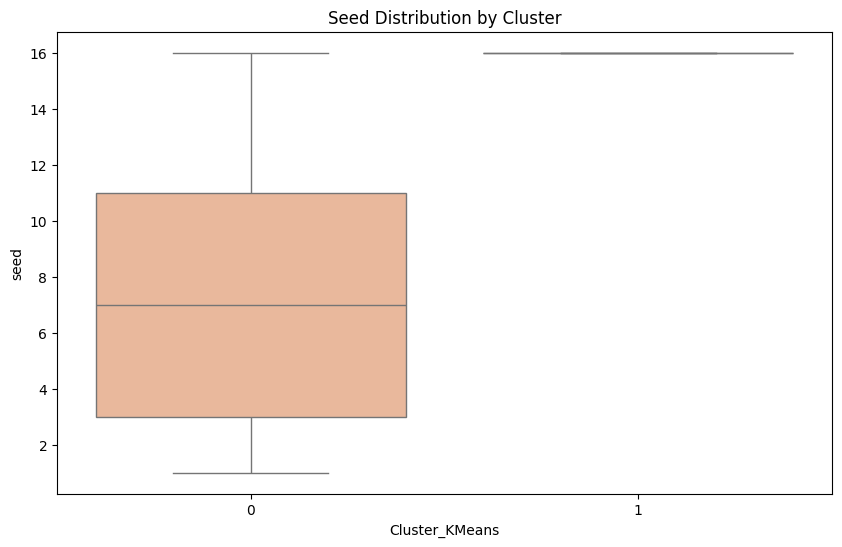

In [140]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_KMeans', y='seed', data=tournament_df)
plt.title('Seed Distribution by Cluster')
plt.show()

game_round      CHAMPIONSHIP  ELITE 8  ELITE EIGHT  FINAL FOUR  FIRST FOUR  \
Cluster_KMeans                                                               
0                          6       16            8          12          16   
1                          0        0            0           0           8   

game_round      FIRST ROUND  SECOND ROUND  SWEET 16  
Cluster_KMeans                                       
0                       190            96        48  
1                         0             0         0  
                count       mean       std   min   25%   50%   75%   max
Cluster_KMeans                                                          
0               392.0   7.283163  4.603337   1.0   3.0   7.0  11.0  16.0
1                 8.0  16.000000  0.000000  16.0  16.0  16.0  16.0  16.0


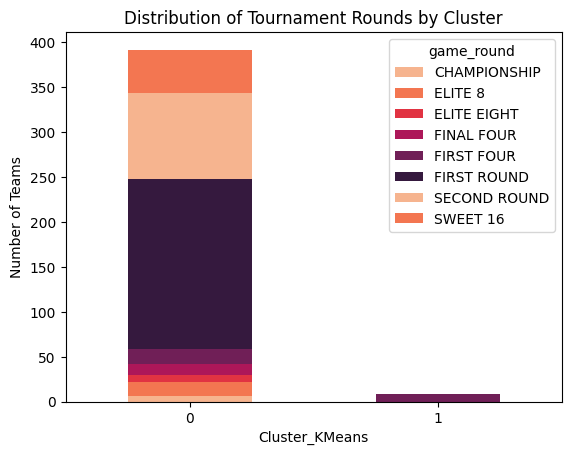

In [195]:
round_distribution = pd.crosstab(tournament_df['Cluster_KMeans'], tournament_df['game_round'])

seed_distribution = tournament_df.groupby('Cluster_KMeans')['seed'].describe()

print(round_distribution)
print(seed_distribution)

round_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Tournament Rounds by Cluster')
plt.xlabel('Cluster_KMeans')
plt.ylabel('Number of Teams')
plt.xticks(rotation=0)  
plt.show()

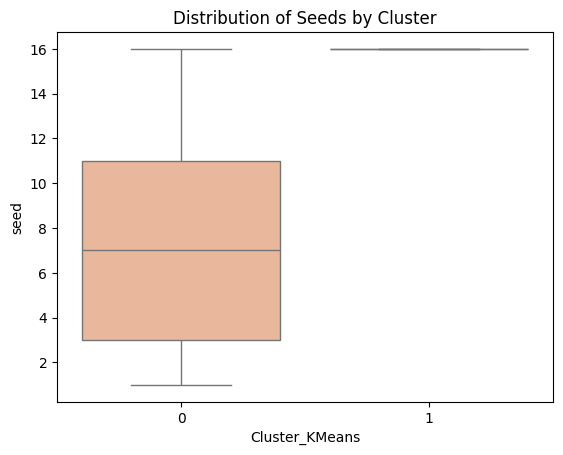

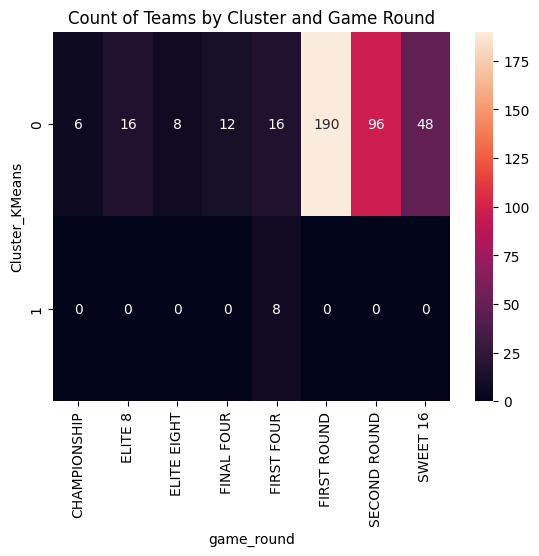

In [142]:
tournament_data = final_df[final_df['season_type'] == 'ncaa_tournament']

pivot_table = pd.pivot_table(tournament_data, index='Cluster_KMeans', columns='game_round', aggfunc='size', fill_value=0)

tournament_stats = tournament_data.groupby('Cluster_KMeans')['seed'].agg(['count', 'mean', 'median', 'std'])

sns.boxplot(x='Cluster_KMeans', y='seed', data=tournament_data)
plt.title('Distribution of Seeds by Cluster')
plt.show()

sns.heatmap(pivot_table, annot=True, fmt='g')
plt.title('Count of Teams by Cluster and Game Round')
plt.show()

Skewness for cluster 0: 0.3084748661830926


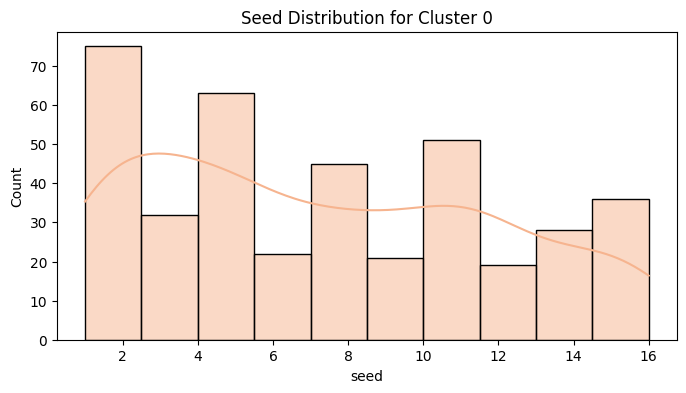

Skewness for cluster 1: 0


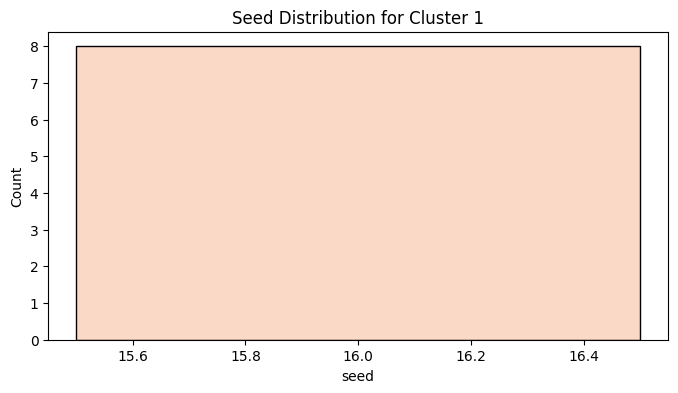

In [143]:
for cluster in sorted(tournament_data['Cluster_KMeans'].unique()):
    cluster_data = tournament_data[tournament_data['Cluster_KMeans'] == cluster]
    skewness = cluster_data['seed'].skew()
    print(f"Skewness for cluster {cluster}: {skewness}")
    plt.figure(figsize=(8, 4))
    sns.histplot(cluster_data['seed'], kde=True)
    plt.title(f'Seed Distribution for Cluster {cluster}')
    plt.show()


     Cluster_KMeans  conf    game_round          oe
99                0   WCC  CHAMPIONSHIP  122.452414
100               0   WCC       ELITE 8  122.452414
102               0   WCC    FINAL FOUR  122.452414
105               0   WCC      SWEET 16  120.931987
101               0   WCC   ELITE EIGHT  120.908617
..              ...   ...           ...         ...
110               1  Slnd    FIRST FOUR  106.049822
107               1   NEC    FIRST FOUR  105.141744
108               1    SB    FIRST FOUR  104.283340
106               1  MEAC    FIRST FOUR  101.658375
109               1  SWAC    FIRST FOUR   99.055587

[111 rows x 4 columns]


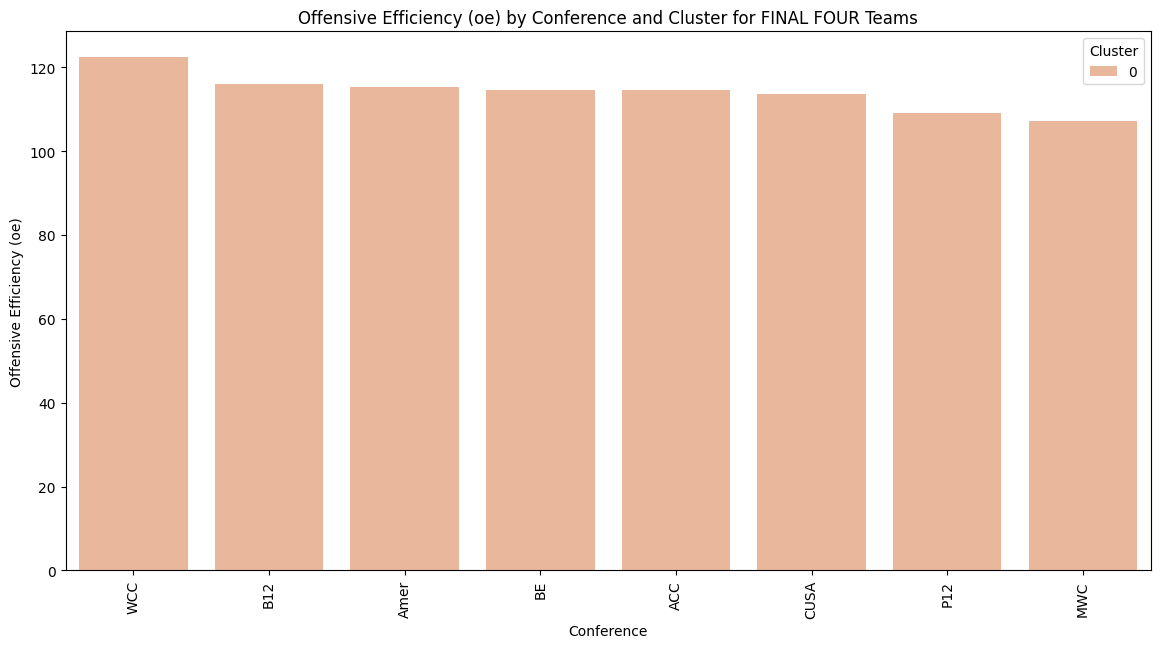

In [145]:
tournament_teams = final_df[final_df['season_type'] == 'ncaa_tournament']

cluster_conf_tourney_oe = tournament_teams.groupby(['Cluster_KMeans', 'conf', 'game_round'])['oe'].mean().reset_index()

cluster_conf_tourney_oe_sorted = cluster_conf_tourney_oe.sort_values(by=['Cluster_KMeans', 'oe'], ascending=[True, False])

print(cluster_conf_tourney_oe_sorted)

final_four_teams = cluster_conf_tourney_oe_sorted[cluster_conf_tourney_oe_sorted['game_round'] == 'FINAL FOUR']

plt.figure(figsize=(14, 7))
sns.barplot(x='conf', y='oe', hue='Cluster_KMeans', data=final_four_teams)
plt.title('Offensive Efficiency (oe) by Conference and Cluster for FINAL FOUR Teams')
plt.xlabel('Conference')
plt.ylabel('Offensive Efficiency (oe)')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()

     Cluster_KMeans  conf    game_round          de
70                0   NEC   FIRST ROUND  106.402986
71                0   NEC  SECOND ROUND  106.402986
4                 0   ACC   ELITE EIGHT  105.407011
95                0   Sum  SECOND ROUND  103.098360
96                0   Sum      SWEET 16  103.098360
..              ...   ...           ...         ...
107               1   NEC    FIRST FOUR  102.049419
110               1  Slnd    FIRST FOUR   97.034401
109               1  SWAC    FIRST FOUR   96.910741
106               1  MEAC    FIRST FOUR   96.296296
108               1    SB    FIRST FOUR   95.128500

[111 rows x 4 columns]


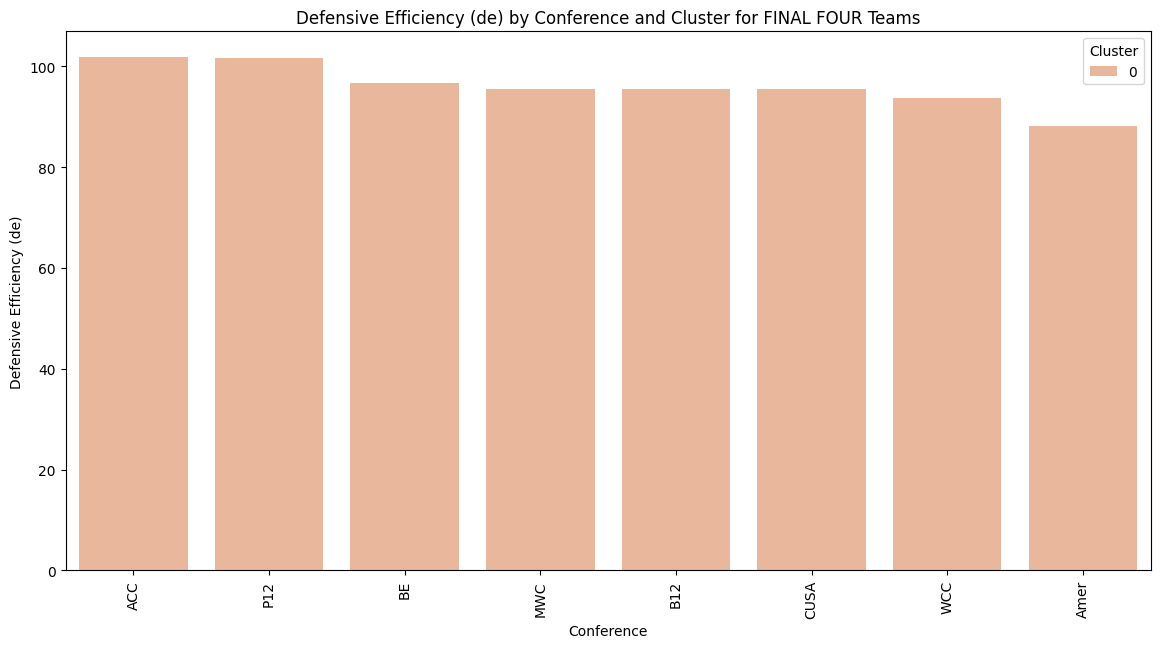

In [146]:
tournament_teams = final_df[final_df['season_type'] == 'ncaa_tournament']

cluster_conf_tourney_de = tournament_teams.groupby(['Cluster_KMeans', 'conf', 'game_round'])['de'].mean().reset_index()

cluster_conf_tourney_de_sorted = cluster_conf_tourney_de.sort_values(by=['Cluster_KMeans', 'de'], ascending=[True, False])

print(cluster_conf_tourney_de_sorted)

final_four_teams = cluster_conf_tourney_de_sorted[cluster_conf_tourney_de_sorted['game_round'] == 'FINAL FOUR']

plt.figure(figsize=(14, 7))
sns.barplot(x='conf', y='de', hue='Cluster_KMeans', data=final_four_teams)
plt.title('Defensive Efficiency (de) by Conference and Cluster for FINAL FOUR Teams')
plt.xlabel('Conference')
plt.ylabel('Defensive Efficiency (de)')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()

In [148]:
clustering_data = clustering_data.drop(columns=['Cluster_DBSCAN', 'Cluster_HC'])

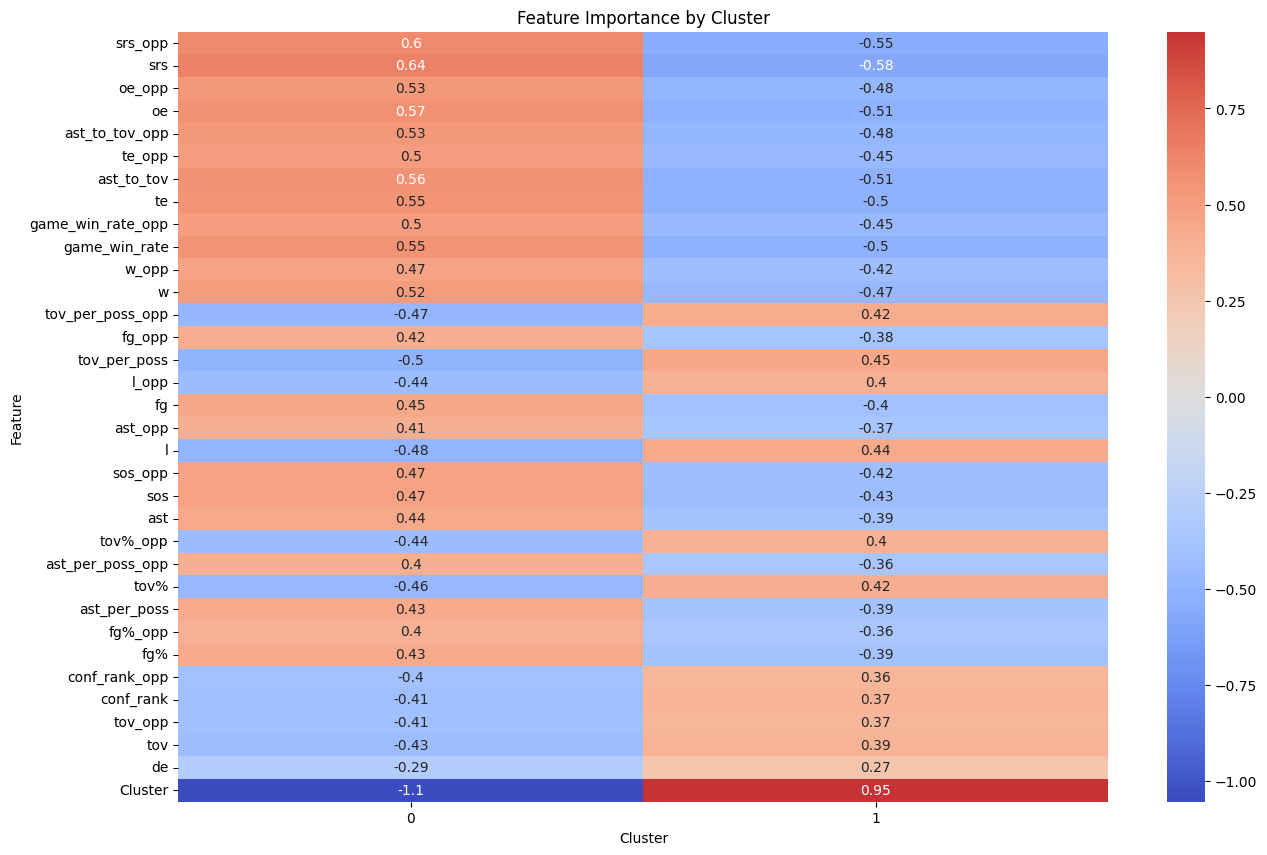

In [149]:

cluster_summary = clustering_data.groupby('Cluster_KMeans').agg(['mean', 'std']).reset_index()

feature_importance = clustering_data.groupby('Cluster_KMeans').mean() - clustering_data.drop('Cluster_KMeans', axis=1).mean()
feature_importance = feature_importance.divide(clustering_data.drop('Cluster_KMeans', axis=1).std())

plt.figure(figsize=(15, 10))
sns.heatmap(feature_importance.T, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Importance by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()
